# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     Sara Hernandez Ochoa |   |
| **Fecha**     31/08/2025 |   |
| **Expediente*750733* |   |

## Regresión polinomial

Observa la siguiente gráfica.

In [47]:
import matplotlib.pyplot as plt; import numpy as np
from sklearn.metrics import r2_score
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

- **Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)**

In [16]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [48]:
lr=LinearRegression()
lr.fit(x.reshape(-1,1),y)
print(f"Coeficiente: {lr.coef_[0]:.4f}, Intercepto: {lr.intercept_:.4f}")


Coeficiente: -0.0496, Intercepto: 13.3022


In [ ]:
Intercepto de 0.0495

- **Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.**

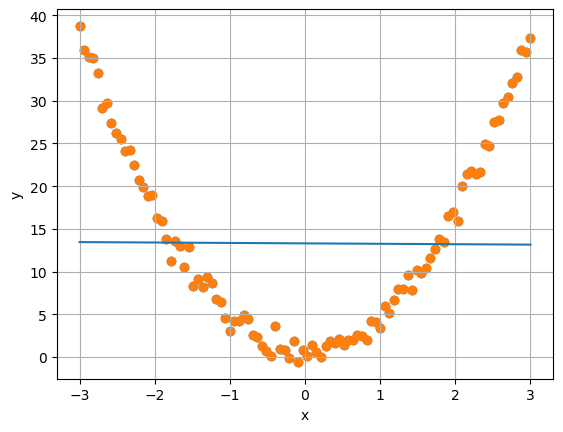

In [18]:
plt.scatter(x,y)
plt.plot(x.reshape(-1,1),lr1.predict(x.reshape(-1,1)))
plt.show()

In [19]:
r=r2_score(y,lr1.predict(x.reshape(-1,1)))
print(r)

5.80345273922811e-05


Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

- **Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.**

In [20]:
x2=np.column_stack([x,x**2])
lr1=LinearRegression()
lr1.fit(x2,y)
print(lr1.coef_,lr1.intercept_)

[-0.04955448  4.14388884] 0.619420963180481


In [21]:
r1=r2_score(y,lr1.predict(x2))
print(r1)

0.9934118040713642


- **Crea una gráfica con las observaciones y la nueva curva que ajustaste.**

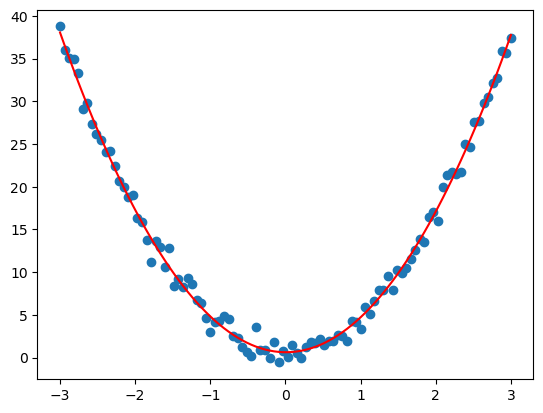

In [27]:
plt.scatter(x,y)
plt.plot(x,lr1.predict(x2),color='red')
plt.show()

Cuando agregamos x2 la curva se adapta casi perfecto a los datos. El R^2 cercano a 1 confirma que el patrón es cuadrático y ahora sí se captura la forma real de los puntos.

- **Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.**

In [28]:
x3=np.column_stack([x,x**2,x**3])
lr2=LinearRegression()
lr2.fit(x3,y)
print(lr2.coef_,lr2.intercept_)

[-6.55753967e-02  4.14388884e+00  2.90847549e-03] 0.619420963180481


In [29]:
x5=np.column_stack([x,x**2,x**3,x**4,x**5])
lr5=LinearRegression()
lr5.fit(x5,y)
print(lr5.coef_,lr5.intercept_)

[-2.76393644e-01  4.12831746e+00  1.10135698e-01  1.97920171e-03
 -1.05167018e-02] 0.6337116478282638


In [35]:
x7=np.column_stack([x,x**2,x**3,x**4,x**5,x**6,x**7])
lr7=LinearRegression()
lr7.fit(x7,y)
print(lr7.coef_,lr7.intercept_)

[-1.75155617e-01  4.18219958e+00  1.07431886e-02 -1.56446593e-02
  1.33331414e-02  1.40889740e-03 -1.61012799e-03] 0.6101810919962016


In [36]:
x9 = np.column_stack([x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9])
lr9 = LinearRegression()
lr9.fit(x9, y)
print(lr9.coef_, lr9.intercept_)

[-1.10778098e-01  4.26535653e+00 -9.23732104e-02 -6.55597796e-02
  5.72464222e-02  1.08500851e-02 -8.45937252e-03 -5.51840642e-04
  3.53081565e-04] 0.5890185996496538


In [30]:
x11 = np.column_stack([x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11])
lr11 = LinearRegression()
lr11.fit(x11, y)
print(lr11.coef_, lr11.intercept_)

[ 9.00703987e-02  4.39720527e+00 -5.68294874e-01 -1.90428125e-01
  3.69496567e-01  5.17798355e-02 -9.13700221e-02 -5.98142327e-03
  9.92036867e-03  2.50411792e-04 -3.99285153e-04] 0.5670839644956622


- **Crea una gráfica por cada modelo con las observaciones y su curva.**

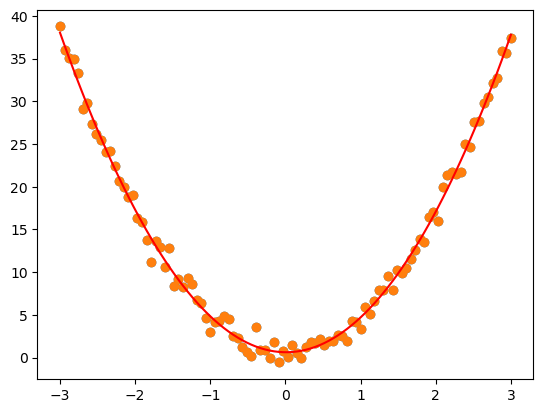

In [32]:
plt.scatter(x,y)
plt.plot(x,lr2.predict(x3),color='red')
plt.show()

El ajuste mejora apenas un poco en R^2, pero la forma de la curva ya no cambia mucho. Esto muestra que agregar más términos empieza a ser innecesario.

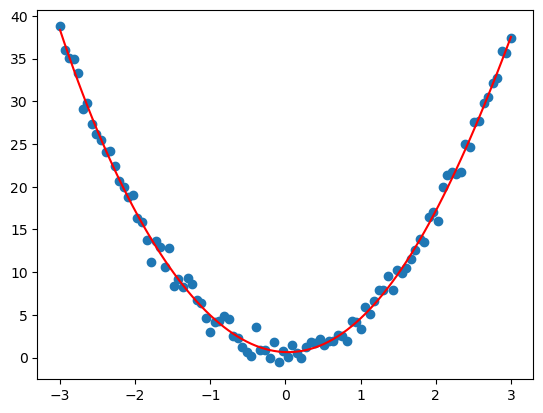

In [33]:
plt.scatter(x,y)
plt.plot(x,lr5.predict(x5),color='red')
plt.show()

El R^2 sube un poco más, pero los coeficientes se hacen más grandes y el modelo empieza a ser más inestable, aunque todavía da predicciones razonables.

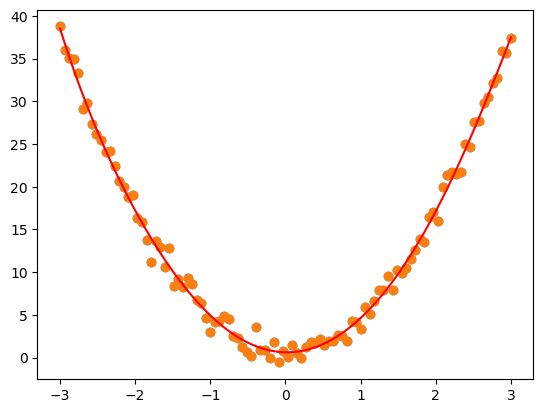

In [37]:
plt.scatter(x,y)
plt.plot(x,lr7.predict(x7),color='red')
plt.show()

El R^2 sigue muy parecido, pero la predicción se empieza a desviar.

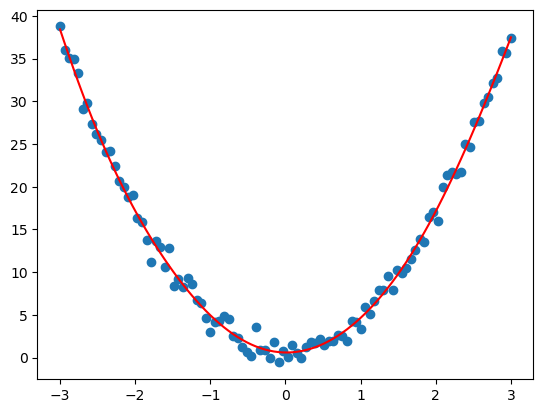

In [38]:
plt.scatter(x,y)
plt.plot(x,lr9.predict(x9),color='red')
plt.show()

Los coeficientes ya son muchos y empiezan a oscilar entre positivos y negativos muy pequeños, lo que indica que la curva se está “retorciendo", dio un valor exagerado de 215, lo que muestra que el modelo no generaliza bien y es muy sensible.

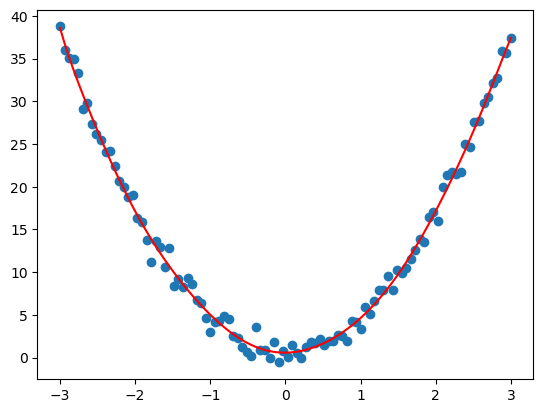

In [39]:
plt.scatter(x,y)
plt.plot(x,lr11.predict(x11),color='red')
plt.show()

El grado 11 se ajusta casi perfecto a los puntos conocidos (por eso el R² es apenas más alto), el modelo se vuelve tan sensible que cualquier valor nuevo o fuera del rango explota en predicciones absurdas, como el -5265.

### **¿Cuál modelo consideras que es mejor? ¿Por qué?**

El mejor es el modelo cuadrático (grado 2), porque se ajusta casi perfecto a los datos con un R^2 muy alto, sin necesidad de complicarse con más términos. Además, sus predicciones son coherentes y estables, a diferencia de los grados altos que se vuelven inestables.

es el mejor para extrapolar: no se vuelve inestable y sus predicciones son razonables, además de que el R² ya es suficientemente alto como para no necesitar más términos.

- Grado 5: 84.6. Ya empieza a desviarse un poco.
- Grado 7: 33.7. Desviación grande.
- Grado 9: 215. Desviación enorme.
- Grado 11: -5265. Desviación extrema.
- Grado 2: 103.97. 
- Grado 3: 104.25.

Extrapolar con grados altos es riesgoso porque crecen muy rápido cuando  x se aleja del rango de los datos. Los modelos de grado bajo (como el cuadrático) solo tienen x2 como mayor potencia, así que aunque extrapoles, los valores crecen de manera controlada y siguen teniendo sentido

In [41]:
r3 = r2_score(y, lr2.predict(x3))
r5 = r2_score(y, lr5.predict(x5))
r7 = r2_score(y, lr7.predict(x7))
r9 = r2_score(y, lr9.predict(x9))
r11 = r2_score(y, lr11.predict(x11))


In [43]:
print(r1,r3, r5, r7, r9, r11)

0.9934118040713642 0.9934129585186598 0.9934954953676421 0.9935089341876935 0.9935141799662259 0.9935338704150221


Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

- **Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).**

In [45]:
p1=lr1.predict([[5, 5**2]])
p2=lr2.predict([[5, 5**2, 5**3]])
p3=lr5.predict([[5, 5**2, 5**3, 5**4, 5**5]])
p4=lr7.predict([[5, 5**2, 5**3, 5**4, 5**5, 5**6, 5**7]])
p5=lr9.predict([[5, 5**2, 5**3, 5**4, 5**5, 5**6, 5**7, 5**8, 5**9]])
p6=lr11.predict([[5, 5**2, 5**3, 5**4, 5**5, 5**6, 5**7, 5**8, 5**9, 5**10, 5**11]])

In [46]:
print(p1, p2, p3, p4, p5, p6)

[103.96886955] [104.25232439] [84.59895013] [33.74321848] [215.73637926] [-5265.34425354]


- **¿Cuál modelo crees que sea mejor?**

También el cuadrático, ya que es el que mejor balance logra: explica la relación real de los datos y al mismo tiempo generaliza mejor que los modelos de grados grandes, que aunque suben un poco el R^2, dan predicciones poco realistas.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3